## Equações algébricas não lineares

O coeficiente de saturação do oxigênio dissolvido em água fresca pode ser calculado pela equação (APHA, 1992).

$ln_{osf} = -139,34411 + \frac{1,272701*10^{5}}{T_{a}} - \frac{6,642308*10^{7}}{T^2_{a}}+\frac{1,243800*10^{10}}{T^3_{a}} - \frac{8.621949*10^{11}}{T^4_{a}}$

Onde $o_{sf}$ é a concentração de saturação do oxigênio dissolvido em agua freca a 1 atm (mg/L) e $T_{a}$ é a temperatura absoluta (K). Lembre-se de que $T_{a} = T + 273,15$, onde T é a temperatura (ºC). De acordo com essa equação, a saturação diminui com o aumento da temperatura. Para águas naturais típicas em climas temperados, a euqação pode ser usada para determinar a variação da concentração de oxigenio de 14,621 ml/L a 0ºC até 6,413 mg/L a 40ºC. Dado um valor da concentração de oxigênio e a equação acima, os **métodos da bissecção** e da **falsa posição** podem ser usados para determinar a temperatura em ºC


a) Se as aproximações iniciais forem tomadas como 0ºC a 40ºC, quantas iterações serão necessárias em cada método para determinar a temperatura até um erro absoluto de 0,05ºC?

b) Desenvolva e teste os programas de Bissecção  Falsa posição para determinar a temperatura como função de uma dada concentração de oxigênio até um erro abosluto pré-especificado como em (a). Dada as aproximações iniciais de 0ºC e 40ºC, teste seu programa para um erro abosluto de 0,05ºC e os seguintes casos $o_{sf} = 8,10 e 12 mg/L$

c) Verifique seus resultados e compare qual dos dois métodos foi mais rapido, ou seja, utilizou menor números de iterações e qual deles obteve menor erro.

O documento de base utilizado foi o oferecido pela professora através do moodle, o qual também continha o enunciado do exercício. As fórmulas utilizadas, bem como a metodologia podem ser vistas na figura abaixo:
#Método da Bissecção
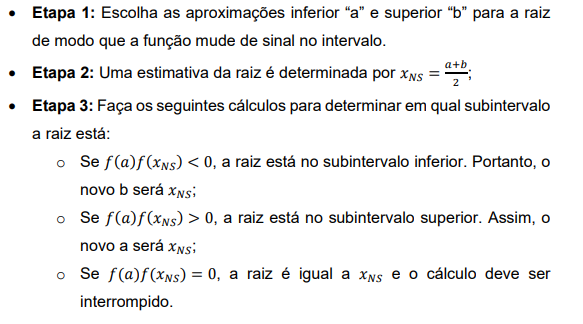




#Método da Falsa Posição

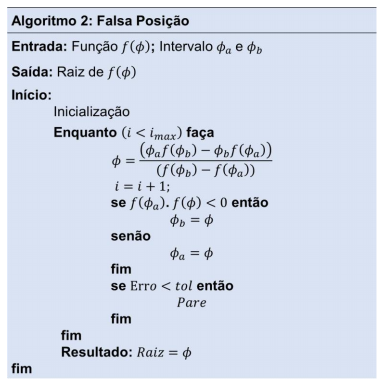

In [ ]:
#Método da Bissecção
#Letra A
# Supondo que queremos achar a temperatura quando a concentração for igual a 11.
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return np.exp(-139.34411+((1.575701*(10**5))/x)-((6.642308*(10**7))/(x**2))+((1.243800*(10**10))/(x**3))-((8.621949*(10**11))/(x**4))) - 11


b = 313.15 #ponto final 
a = 273.15 #ponto inicial
eps = 0.05 #precisão que utilizaremos como critério de parada


iter = 0 #critério 2 de parada
xk = []

while ((b-a)>eps)&(iter <= 40): #verificar se o tamanho do intervalo está maior do que a precisão que pedimos
  print('[',a,',',b,']') #imprime o valor de a e b a cada passo/iteração
  x0 = (b+a)/2 #em algum momento espera-se que o intervalo seja pequeno o suficiente para que possamos parar
  xk.append(x0) #adiciono os pontos médios obtidos dos intervalos para analisar o método
  # Novo intervalo: [a, x0]
  if f(x0)*f(b) > 0:
    b = x0
  # Novo intervalo: [x0, b]
  else:
    a = x0
  iter = iter + 1 #atualizar a iteração para que nao seja um processo infinito

print('\n')
print('São necessárias para o método da Bissecção:',iter,'iterações')
print('O erro é:',abs(a-b),'K')
print('A temperatura final encontrada foi de:',x0,'K')

[ 273.15 , 313.15 ]
[ 273.15 , 293.15 ]
[ 283.15 , 293.15 ]
[ 283.15 , 288.15 ]
[ 283.15 , 285.65 ]
[ 283.15 , 284.4 ]
[ 283.775 , 284.4 ]
[ 284.0875 , 284.4 ]
[ 284.24375 , 284.4 ]
[ 284.24375 , 284.321875 ]


São necessárias para o método da Bissecção: 10 iterações
O erro é: 0.0390625 K
A temperatura final encontrada foi de: 284.2828125 K


In [ ]:
#Método da Falsa Posição
#Letra A
# Supondo que queremos achar a temperatura quando a concentração for igual a 11.

import matplotlib.pyplot as plt
import numpy as np
#Definindo a função
def f(x):

  return np.exp(-139.34411+((1.575701*(10**5))/x)-((6.642308*(10**7))/(x**2))+((1.243800*(10**10))/(x**3))-((8.621949*(10**11))/(x**4))) - 11

b = 313.15 #ponto final 

a = 273.15 #ponto inicial

eps = 0.05  #precisão que utilizaremos como critério de parada

#começando o método iterativo

iter = 0 #critério 2 de parada

xk = []

while (iter <= 100): #verificar se o tamanho do intervalo está maior do que a precisão que pedimos

  print('[',a,',',b,']') #imprime o valor de a e b a cada passo/iteração

  x = (a*f(b)-b*f(a))/(f(b)-f(a)) #em algum momento espera-se que o intervalo seja pequeno o suficiente para que possamos parar
  print(x)
  erro = abs(a-b)
  xk.append(x) #adiciono os pontos médios obtidos dos intervalos para analisar o método
  fx = f(x)
  iter = iter + 1 #atualizar a iteração para que nao seja um processo infinito
  if erro < eps:
    break;
  if f(a)*f(x) < 0:
    b = x   
  # Novo intervalo: [x0, b]
  else:
    a = x
print('\n')
print('São necessárias para o método da Falsa Posição:',iter,'iterações')
print('O erro é:',erro,'K')
print('A temperatura final encontrada foi de:',x,'K')

[ 273.15 , 313.15 ]
290.79514781550574
[ 273.15 , 290.79514781550574 ]
285.71577937073914
[ 273.15 , 285.71577937073914 ]
284.57891613692385
[ 273.15 , 284.57891613692385 ]
284.3276943136506
[ 273.15 , 284.3276943136506 ]
284.2723670879618
[ 273.15 , 284.2723670879618 ]
284.2601916446393
[ 273.15 , 284.2601916446393 ]
284.25751274649576
[ 273.15 , 284.25751274649576 ]
284.2569233450426
[ 273.15 , 284.2569233450426 ]
284.2567936681526
[ 273.15 , 284.2567936681526 ]
284.25676513739967
[ 273.15 , 284.25676513739967 ]
284.25675886023316
[ 273.15 , 284.25675886023316 ]
284.25675747917245
[ 273.15 , 284.25675747917245 ]
284.2567571753158
[ 273.15 , 284.2567571753158 ]
284.25675710845945
[ 273.15 , 284.25675710845945 ]
284.25675709375486
[ 273.15 , 284.25675709375486 ]
284.25675709051325
[ 273.15 , 284.25675709051325 ]
284.2567570897986
[ 273.15 , 284.2567570897986 ]
284.2567570896479
[ 273.15 , 284.2567570896479 ]
284.2567570896151
[ 273.15 , 284.2567570896151 ]
284.2567570896092
[ 273.15 , 

In [ ]:
#Método da Bissecção
#EXERCICIO B
#f(x)=8
import matplotlib.pyplot as plt
import numpy as np
import time as t
tempo = t.time()
def f(x):
  funcao = np.exp(-139.34411+((1.575701*(10**5))/x)-((6.642308*(10**7))/(x**2))+((1.243800*(10**10))/(x**3))-((8.621949*(10**11))/(x**4)))
  funcao = funcao - 8
  return funcao


b = 313.15 #ponto final
a = 273.15 #ponto inicial
eps = 0.05 #precisão que utilizaremos como critério de parada

iter = 0 #critério 2 de parada
xk = []
fx = []
while ((b-a)>eps)&(iter <= 40): #verificar se o tamanho do intervalo está maior do que a precisão que pedimos
  print('[',a,',',b,']') #imprime o valor de a e b a cada passo/iteração
  x0 = (b+a)/2 #em algum momento espera-se que o intervalo seja pequeno o suficiente para que possamos parar
  y = f(x0)
  fx.append(y)
  xk.append(x0) #adiciono os pontos médios obtidos dos intervalos para analisar o método
  # Novo intervalo: [a, x0]
  if f(x0)*f(b)>0:
    b = x0
  # Novo intervalo: [x0, b]
  else:
    a = x0
  iter = iter + 1 #atualizar a iteração para que nao seja um processo infinit
erro = abs(b-a)



print('\n')
print('São necessárias para o método da Bissecção:',iter,'iterações')
print('O erro é:',erro,'K')
print('A temperatura final encontrada foi de:',x0,'K')
tempoExec = t.time() - tempo
print(f'Tempo de execução: {round(tempoExec,5)} segundos')


[ 273.15 , 313.15 ]
[ 293.15 , 313.15 ]
[ 293.15 , 303.15 ]
[ 298.15 , 303.15 ]
[ 298.15 , 300.65 ]
[ 299.4 , 300.65 ]
[ 299.4 , 300.025 ]
[ 299.7125 , 300.025 ]
[ 299.86875 , 300.025 ]
[ 299.86875 , 299.946875 ]


São necessárias para o método da Bissecção: 10 iterações
O erro é: 0.0390625 K
A temperatura final encontrada foi de: 299.9078125 K
Tempo de execução: 0.00732 segundos


In [ ]:
#Método da Bissecção
#EXERCICIO B
#f(x)=10
import time as t
import numpy as np 
tempo = t.time()
def f(x):
  funcao = np.exp(-139.34411+((1.575701*(10**5))/x)-((6.642308*(10**7))/(x**2))+((1.243800*(10**10))/(x**3))-((8.621949*(10**11))/(x**4)))
  funcao = funcao - 10
  return funcao
 
 
b = 313.15 #ponto final
a = 273.15 #ponto inicial
eps = 0.05 #precisão que utilizaremos como critério de parada
 
iter = 0 #critério 2 de parada
xk = []
fx = []
while ((b-a)>eps)&(iter <= 40): #verificar se o tamanho do intervalo está maior do que a precisão que pedimos
  print('[',a,',',b,']') #imprime o valor de a e b a cada passo/iteração
  x0 = (b+a)/2 #em algum momento espera-se que o intervalo seja pequeno o suficiente para que possamos parar
  y = f(x0)
  fx.append(y)
  xk.append(x0) #adiciono os pontos médios obtidos dos intervalos para analisar o método
  # Novo intervalo: [a, x0]
  if f(x0)*f(b)>0:
    b = x0
  # Novo intervalo: [x0, b]
  else:
    a = x0
  iter = iter + 1 #atualizar a iteração para que nao seja um processo infinit
erro = abs(b-a)
 
 
print('\n')
print('São necessárias para o método da Bissecção:',iter,'iterações')
print('O erro é:',erro,'K')
print('A temperatura final encontrada foi de:',x0,'K')

[ 273.15 , 313.15 ]
[ 273.15 , 293.15 ]
[ 283.15 , 293.15 ]
[ 288.15 , 293.15 ]
[ 288.15 , 290.65 ]
[ 288.15 , 289.4 ]
[ 288.15 , 288.775 ]
[ 288.4625 , 288.775 ]
[ 288.4625 , 288.61875 ]
[ 288.4625 , 288.540625 ]


São necessárias para o método da Bissecção: 10 iterações
O erro é: 0.0390625 K
A temperatura final encontrada foi de: 288.5015625 K


In [ ]:
#Método da Bissecção
#EXERCICIO B
#f(x)=12
import time as t
tempo = t.time()
def f(x):
  funcao = np.exp(-139.34411+((1.575701*(10**5))/x)-((6.642308*(10**7))/(x**2))+((1.243800*(10**10))/(x**3))-((8.621949*(10**11))/(x**4)))
  funcao = funcao - 12
  return funcao


b = 313.15 #ponto final
a = 273.15 #ponto inicial
eps = 0.05 #precisão que utilizaremos como critério de parada

iter = 0 #critério 2 de parada
xk = []
fx = []
while ((b-a)>eps)&(iter <= 40): #verificar se o tamanho do intervalo está maior do que a precisão que pedimos
  print('[',a,',',b,']') #imprime o valor de a e b a cada passo/iteração
  x0 = (b+a)/2 #em algum momento espera-se que o intervalo seja pequeno o suficiente para que possamos parar
  y = f(x0)
  fx.append(y)
  xk.append(x0) #adiciono os pontos médios obtidos dos intervalos para analisar o método
  # Novo intervalo: [a, x0]
  if f(x0)*f(b)>0:
    b = x0
  # Novo intervalo: [x0, b]
  else:
    a = x0
  iter = iter + 1 #atualizar a iteração para que nao seja um processo infinit
erro = abs(b-a)



print('\n')
print('São necessárias para o método da Bissecção:',iter,'iterações')
print('O erro é:',erro,'K')
print('A temperatura final encontrada foi de:',x0,'K')
tempoExec = t.time() - tempo
print(f'Tempo de execução: {round(tempoExec,5)} segundos')

[ 273.15 , 313.15 ]
[ 273.15 , 293.15 ]
[ 273.15 , 283.15 ]
[ 278.15 , 283.15 ]
[ 278.15 , 280.65 ]
[ 279.4 , 280.65 ]
[ 280.025 , 280.65 ]
[ 280.3375 , 280.65 ]
[ 280.49375 , 280.65 ]
[ 280.571875 , 280.65 ]


São necessárias para o método da Bissecção: 10 iterações
O erro é: 0.0390625 K
A temperatura final encontrada foi de: 280.6109375 K
Tempo de execução: 0.00926 segundos


In [ ]:
#Método da Falsa Posição
# LETRA B
#f(x) = 8
# ao invés de achar o ponto médio, eu faço uma media aritmética ponderada pelo valor de f no ponto a ou b.
# Se eu pegar um extremo e outro, e traçar uma reta, tenho uma estimativa linear.
import time as t
import matplotlib.pyplot as plt
import numpy as np
tempo = t.time()
def f(x):
  return np.exp(-139.34411+((1.575701*(10**5))/x)-((6.642308*(10**7))/(x**2))+((1.243800*(10**10))/(x**3))-((8.621949*(10**11))/(x**4))) - 8
b = 313.15 #ponto final 
a = 273.15 #ponto inicial
eps = 0.05  #precisão que utilizaremos como critério de parada
x = np.arange(a,b,eps)
#começando o método iterativo
iter = 0 #critério 2 de parada
xk = []
while (iter <= 100): #verificar se o tamanho do intervalo está maior do que a precisão que pedimos
  print('[',a,',',b,']') #imprime o valor de a e b a cada passo/iteração
  x = (a*f(b)-b*f(a))/(f(b)-f(a)) #em algum momento espera-se que o intervalo seja pequeno o suficiente para que possamos parar
  erro = abs(a-b)
  xk.append(x) #adiciono os pontos médios obtidos dos intervalos para analisar o método
  fx = f(x)
  iter = iter + 1 #atualizar a iteração para que nao seja um processo infinito
  if erro < eps:
    break
  if f(a)*f(x)<0:
    b = x   
  # Novo intervalo: [x0, b]
  else:
    a = x
  # Novo intervalo: [a, x0]
erro = abs(b-a)
print('\n')
print('São necessárias para o método da Falsa Posição:',iter,'iterações')
print('O erro é:',erro,'K')
print('A temperatura final encontrada foi de:',x,'K')

[ 273.15 , 313.15 ]
[ 273.15 , 305.41483152076626 ]
[ 273.15 , 302.220176631126 ]
[ 273.15 , 300.8873824823663 ]
[ 273.15 , 300.3303548828102 ]
[ 273.15 , 300.097480334098 ]
[ 273.15 , 300.00011862743503 ]
[ 273.15 , 299.9594127601767 ]
[ 273.15 , 299.9423940787242 ]
[ 273.15 , 299.9352787552579 ]
[ 273.15 , 299.9323039174847 ]
[ 273.15 , 299.931060170951 ]
[ 273.15 , 299.9305401744155 ]
[ 273.15 , 299.93032276966744 ]
[ 273.15 , 299.9302318751735 ]
[ 273.15 , 299.9301938732031 ]
[ 273.15 , 299.9301779850014 ]
[ 273.15 , 299.9301713423244 ]
[ 273.15 , 299.93016856509223 ]
[ 273.15 , 299.93016740396354 ]
[ 273.15 , 299.930166918513 ]
[ 273.15 , 299.9301667155462 ]
[ 273.15 , 299.9301666306913 ]
[ 273.15 , 299.93016659521084 ]
[ 273.15 , 299.93016658037646 ]
[ 273.15 , 299.93016657417655 ]
[ 273.15 , 299.93016657158364 ]
[ 273.15 , 299.9301665705 ]
[ 273.15 , 299.9301665700486 ]
[ 273.15 , 299.9301665698611 ]
[ 273.15 , 299.9301665697822 ]
[ 273.15 , 299.93016656975067 ]
[ 273.15 , 299.9

In [ ]:
#Método da Falsa Posição
#LETRA B
#f(x) = 10
# ao invés de achar o ponto médio, eu faço uma media aritmética ponderada pelo valor de f no ponto a ou b.
# Se eu pegar um extremo e outro, e traçar uma reta, tenho uma estimativa linear.
import time as t
import matplotlib.pyplot as plt
import numpy as np
tempo = t.time()
def f(x):
  return (-139.34411+((1.575701*(10**5))/x)-((6.642308*(10**7))/(x**2))+((1.243800*(10**10))/(x**3))-((8.621949*(10**11))/(x**4)))-np.log(10)
b = 313.15 #ponto final 
a = 273.15 #ponto inicial
eps = 0.05  #precisão que utilizaremos como critério de parada
x = np.arange(a,b,eps)
#começando o método iterativo
iter = 0 #critério 2 de parada
xk = []
while (iter <= 100): #verificar se o tamanho do intervalo está maior do que a precisão que pedimos
  print('[',a,',',b,']') #imprime o valor de a e b a cada passo/iteração
  x = (a*f(b)-b*f(a))/(f(b)-f(a)) #em algum momento espera-se que o intervalo seja pequeno o suficiente para que possamos parar
  erro = abs(a-b)
  xk.append(x) #adiciono os pontos médios obtidos dos intervalos para analisar o método
  fx = f(x)
  iter = iter + 1 #atualizar a iteração para que nao seja um processo infinito
  if erro < eps:
    break
  if f(a)*f(x)<0:
    b = x   
  # Novo intervalo: [x0, b]
  else:
    a = x
  # Novo intervalo: [a, x0]
erro = abs(b-a)
print('\n')
print('São necessárias para o método da Falsa Posição:',iter,'iterações')
print('O erro é:',erro,'K')
print('A temperatura final encontrada foi de:',x,'K')
tempoExec = t.time() - tempo
print(f'Tempo de execução: {round(tempoExec,5)} segundos')

[ 273.15 , 313.15 ]
[ 273.15 , 291.5862593571196 ]
[ 273.15 , 288.9389369301944 ]
[ 273.15 , 288.59090714831257 ]
[ 273.15 , 288.5451401067665 ]
[ 273.15 , 288.5391221135835 ]
[ 273.15 , 288.5383308071996 ]
[ 273.15 , 288.53822675845294 ]
[ 273.15 , 288.5382130771062 ]
[ 273.15 , 288.53821127814814 ]
[ 273.15 , 288.5382110416026 ]
[ 273.15 , 288.5382110104993 ]
[ 273.15 , 288.53821100641215 ]
[ 273.15 , 288.5382110058735 ]
[ 273.15 , 288.5382110057977 ]
[ 288.5382110057904 , 288.5382110057977 ]


São necessárias para o método da Falsa Posição: 16 iterações
O erro é: 7.275957614183426e-12 K
A temperatura final encontrada foi de: 288.5382110057906 K
Tempo de execução: 0.03105 segundos


In [ ]:
#Método da Falsa Posição
#LETRA B
#f(x) = 12
# ao invés de achar o ponto médio, eu faço uma media aritmética ponderada pelo valor de f no ponto a ou b.
# Se eu pegar um extremo e outro, e traçar uma reta, tenho uma estimativa linear.

import matplotlib.pyplot as plt
import numpy as np
import time as t

tempo = t.time()
def f(x):

  return (-139.34411+((1.575701*(10**5))/x)-((6.642308*(10**7))/(x**2))+((1.243800*(10**10))/(x**3))-((8.621949*(10**11))/(x**4)))-np.log(12)

b = 313.15 #ponto final 
a = 273.15 #ponto inicial

eps = 0.05  #precisão que utilizaremos como critério de parada

x = np.arange(a,b,eps)

#começando o método iterativo

iter = 0 #critério 2 de parada

xk = []

while (iter <= 100): #verificar se o tamanho do intervalo está maior do que a precisão que pedimos

  print('[',a,',',b,']') #imprime o valor de a e b a cada passo/iteração

  x = (a*f(b)-b*f(a))/(f(b)-f(a)) #em algum momento espera-se que o intervalo seja pequeno o suficiente para que possamos parar
  
  erro = abs(a-b)

  xk.append(x) #adiciono os pontos médios obtidos dos intervalos para analisar o método

  fx = f(x)
  
  iter = iter + 1 #atualizar a iteração para que nao seja um processo infinito

  if erro < eps:
    break

  if f(a)*f(x)<0:

    b = x   

  # Novo intervalo: [x0, b]

  else:

    a = x

  # Novo intervalo: [a, x0]

erro = abs(b-a)


print('\n')
print('São necessárias para o método da Falsa Posição:',iter,'iterações')
print('O erro é:',erro,'K')
print('A temperatura final encontrada foi de:',x,'K')
tempoExec = t.time() - tempo
print(f'Tempo de execução: {round(tempoExec,5)} segundos')

[ 273.15 , 313.15 ]
[ 273.15 , 282.73745609042066 ]
[ 273.15 , 280.75769502291683 ]
[ 273.15 , 280.62471173334075 ]
[ 273.15 , 280.61582509433373 ]
[ 273.15 , 280.61523146639195 ]
[ 273.15 , 280.61519181302566 ]
[ 273.15 , 280.61518916424365 ]
[ 273.15 , 280.6151889873126 ]
[ 273.15 , 280.6151889754946 ]
[ 273.15 , 280.61518897470626 ]
[ 273.15 , 280.61518897465584 ]
[ 280.615188974643 , 280.61518897465584 ]


São necessárias para o método da Falsa Posição: 13 iterações
O erro é: 1.2846612662542611e-11 K
A temperatura final encontrada foi de: 280.61518897464623 K
Tempo de execução: 0.00737 segundos


Na letra C deve-se analisar ambos métodos utilizados. Assim, analisando-se os resultados da letra B, tem-se que:

## 1) Método da Bissecção
#f(x)=8
São necessárias para o método da Bissecção: 10 iterações

O erro é: 0.0390625 K

A temperatura final encontrada foi de: 284.25675708960244 K

#f(x)=10
São necessárias para o método da Bissecção: 10 iterações

O erro é: 0.0390625 K

A temperatura final encontrada foi de: 284.25675708960244 K

#f(x)=12
São necessárias para o método da Bissecção: 10 iterações

O erro é: 0.0390625 K

A temperatura final encontrada foi de: 280.61518897464623 K


##2) Método da Falsa Posição
#f(x) = 8
São necessárias para o método da Falsa Posição: 38 iterações

O erro é: 3.922195901395753e-12 K

A temperatura final encontrada foi de: 299.93016656972094 K
#f(x)=10
São necessárias para o método da Falsa Posição: 16 iterações

O erro é: 7.275957614183426e-12 K

A temperatura final encontrada foi de: 288.5382110057906 K
#f(x)=12
São necessárias para o método da Falsa Posição: 13 iterações

O erro é: 1.2846612662542611e-11 K

A temperatura final encontrada foi de: 280.61518897464623 K


Dessa forma, avaliando-se ambos resultados, é possível perceber que o método da bissecção, apesar de realizar um número menor de iterações, ou seja, de ser mais leve computacionalmente, apresenta um erro muito maior do que o erro apresentado no método da falsa posição. Ele, apesar de realizar um número maior de iterações, apresenta um erro extremamente baixo, quase irrelevante. Ou seja, a precisão do método da falsa posição é muito maior, apesar de requerer um número maior de iterações.